In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()


Saving dim_customer.json to dim_customer.json
Saving fct_invoice.csv to fct_invoice.csv


In [6]:
df1 = pd.read_json('dim_customer.json', orient='index').T
df2 = pd.read_csv('fct_invoice.csv')

In [9]:
df1

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,None,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,None,Arthur,M,9428,Harris
5187,None,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,None,April,F,10587,Sanchez


In [5]:
df2

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [16]:
# Easy 1: How many unique customers are in the dataset?

unique_customers = df2['customer_id'].nunique()
print("Number of unique customers:", unique_customers)


Number of unique customers: 5191


In [13]:
# Easy 2: What are the different categories of products available? How many unique categories are there?

unique_categories = df['category'].nunique()
print("Number of unique categories:", unique_categories)

Number of unique categories: 8


In [18]:
# Easy 3: Which payment method is the most popular? How many times was it used?

popular_payment_method = df2['payment_method'].value_counts().idxmax()
print("Most popular payment method:", popular_payment_method)

Most popular payment method: Cash


In [21]:
# Medium 1: What are the three most popular categories, by total sales?

df2['total_sales'] = df2['quantity'] * df2['price']
top_three_categories = df2.groupby('category')['total_sales'].sum().sort_values(ascending=False).head(3)
print(top_three_categories)


category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_sales, dtype: float64


In [22]:
# Medium 2: What are the total sales attributed to customers over the age of 45?

df2['total_sales'] = df2['quantity'] * df2['price']
total_sales_over_45 = df2.merge(df1, left_on='customer_id', right_on='id')
total_sales_over_45 = total_sales_over_45[total_sales_over_45['age'] > 45]['total_sales'].sum()
print(f"₱{total_sales_over_45:,.2f}")


₱82,039,768.15


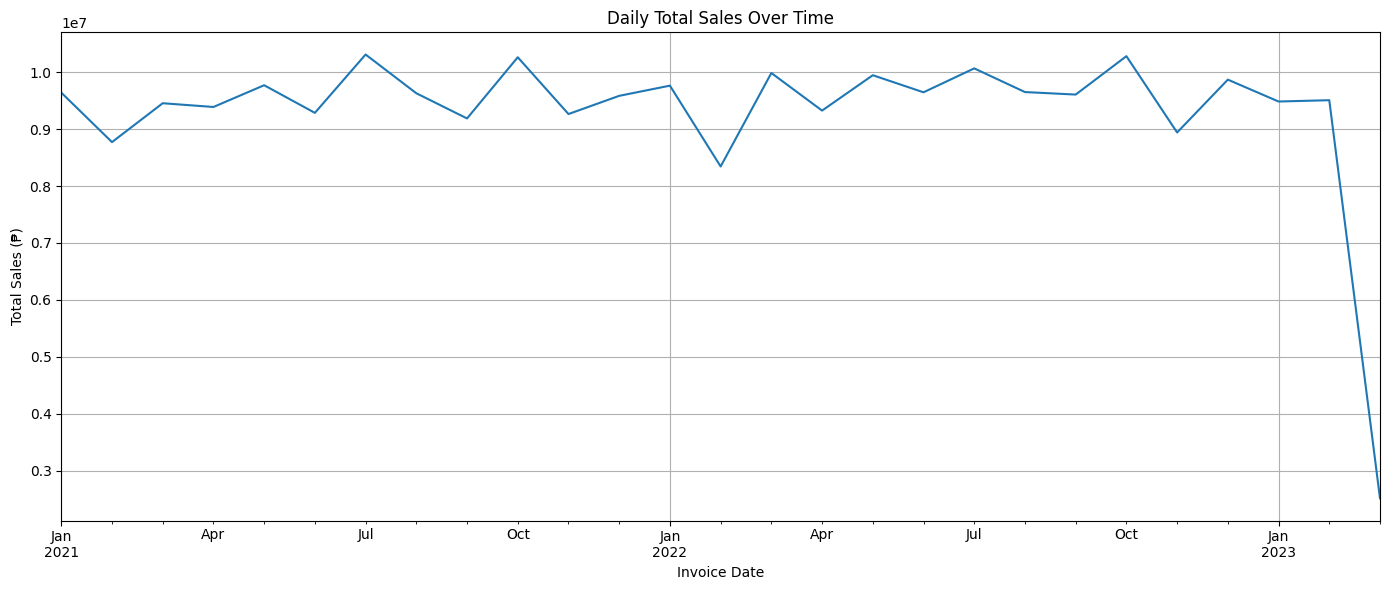

In [28]:
# Medium 3: How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

df2['invoice_date'] = pd.to_datetime(df2['invoice_date'], dayfirst=True)
df2['total_sales'] = df2['quantity'] * df2['price']
daily_sales = df2.groupby('invoice_date')['total_sales'].sum()

plt.figure(figsize=(14, 6))
daily_sales.plot()
plt.title('Daily Total Sales Over Time')
plt.xlabel('Invoice Date')
plt.ylabel('Total Sales (₱)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Answer: Noticeably, there is a great decrease in sales from January to February. This recovers though from February to April. From April to October, we see sales rise during the months of July
# and October then go down after. Sales remain relatively low from December to the incoming year with the pattern repeating itself once more.

In [29]:
# Hard 1: Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

df2['total_sales'] = df2['quantity'] * df2['price']
merged = df2.merge(df1, left_on='customer_id', right_on='id')
merged = merged.dropna(subset=['age'])
merged['age_group'] = (merged['age'] // 10 * 10).astype(int).astype(str) + '-' + ((merged['age'] // 10 * 10) + 9).astype(int).astype(str)
pivot = merged.pivot_table(index='category', columns='age_group', values='total_sales', aggfunc='sum', fill_value=0)
print(pivot)


age_group             10-19        20-29        30-39        40-49  \
category                                                             
Books              12801.75     79461.75     84143.10     87203.40   
Clothing         1927413.84  10250732.80  11354126.96  11215189.92   
Cosmetics         109619.36    605915.32    723544.70    665034.96   
Food & Beverage    13582.31     73491.96     87246.86     89553.29   
Shoes             993281.35   5924878.24   7200839.66   7025590.02   
Souvenir           12375.15     54943.32     64092.72     66391.80   
Technology       1129800.00   5261550.00   6159300.00   5954550.00   
Toys               60426.24    385100.80    420582.40    390906.88   

age_group              50-59        60-69       70-79       80-89  
category                                                           
Books               74962.20     80476.80    54827.85    26664.00  
Clothing         10321851.76  10660642.08  7769371.28  4493698.00  
Cosmetics          587780.9